Titanic Exploratory Data Analysis

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly_express as px
import seaborn as sns

Step 1

Read the file train.csv into Python and print a few rows.

In [3]:
df = pd.read_csv('data/train.csv', sep=',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Step 2

Calculate the number of surviving/non-surviving passengers and display it as a bar plot.


<AxesSubplot:>

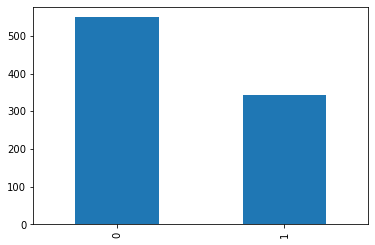

In [4]:
df['Survived'].value_counts().plot.bar()

Step 3

Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [6]:
df[df['Pclass'] == 1]['Survived'].value_counts(normalize = True).head(1)b

1    0.62963
Name: Survived, dtype: float64

In [8]:
df.loc[df['Pclass']== 1]['Survived'].mean()



0.6296296296296297

<AxesSubplot:xlabel='Pclass'>

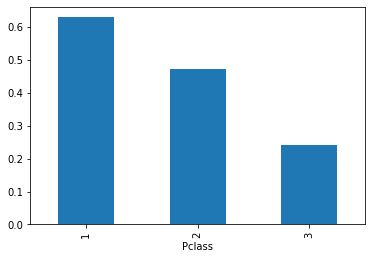

In [10]:
df.groupby('Pclass')['Survived'].mean().plot.bar()
#          ^^^^^^^^define the groups
#                     ^^^^^^select columnsfrom each groups DF
#                               ^^^^aggregation function


Step 4

Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.


<AxesSubplot:xlabel='Sex', ylabel='count'>

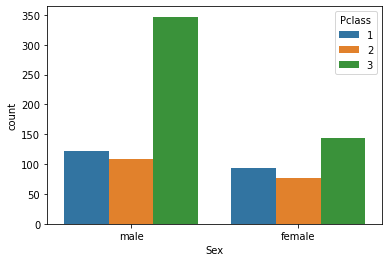

In [70]:
sns.countplot(x='Sex', hue = 'Pclass', data = df)


<AxesSubplot:xlabel='Sex,Pclass'>

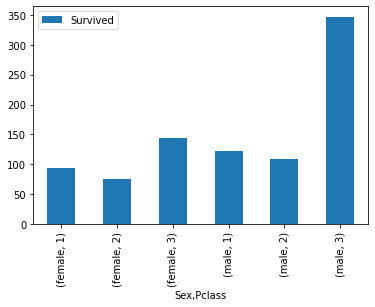

In [13]:
df.groupby(['Sex', 'Pclass'])[['Survived']].count().plot.bar()

<AxesSubplot:xlabel='Sex'>

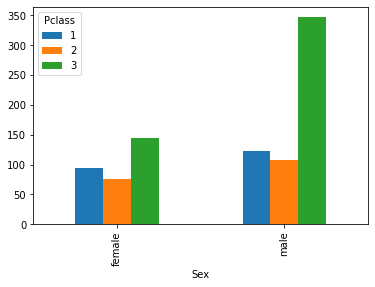

In [15]:
df.groupby(['Sex', 'Pclass'])['Survived'].count().unstack().plot.bar()
# unstack is similar to .explode()
# it converst long to wide format -  there is also .stack()

In [37]:
df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [50]:
len(df[df['Pclass'] == 1])

216

Step 4

Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

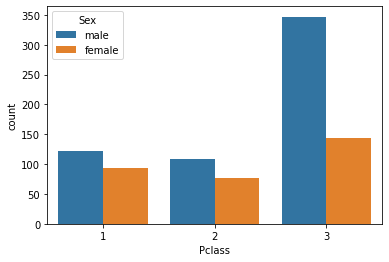

In [63]:
sns.countplot(x="Pclass",hue="Sex",data=df)

Step 5

Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

<AxesSubplot:xlabel='Age', ylabel='Count'>

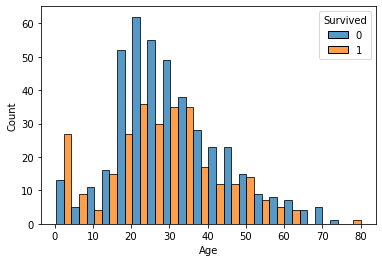

In [32]:
sns.histplot(x="Age",hue="Survived",data=df, multiple='dodge')

<AxesSubplot:>

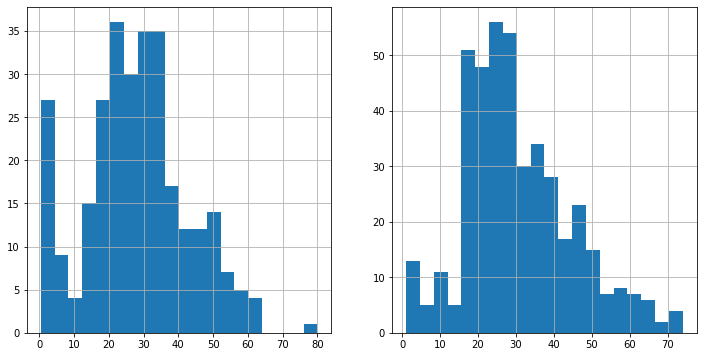

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # <-- grid of 1 x 2 plots, this is the 1st of them
df[df['Survived']==1]['Age'].hist(bins=20)
plt.subplot(1,2,2) # <-- grid of 1 x 2 plots, this is the 2nd of them
df[df['Survived']==0]['Age'].hist(bins=20)

Step 6

Calculate the average age for survived and drowned passengers separately.

In [25]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [26]:
df.loc[df['Survived']==1]['Age'].mean()

28.343689655172415

Step 7

Replace missing age values by the mean age.

In [68]:
df['age_filled'] = df['Age'].fillna(value=df['Age'].mean()) # , inplace=True)

In [ ]:
df

In [27]:
age_means = df.groupby('Pclass')['Age'].transform('mean') # returns a column, the number of rows is the same as df
df['Age'.fillna(age_means)] #uses the existing ages, but replaces missing ones from ages_means

0      25.140620
1      38.233441
2      25.140620
3      38.233441
4      25.140620
         ...    
886    29.877630
887    38.233441
888    25.140620
889    38.233441
890    25.140620
Name: Age, Length: 891, dtype: float64

Step 8

Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [28]:
df.groupby(['Pclass' , 'Survived', 'Sex']).size().unstack()

Sex              female  male
Pclass Survived              
1      0              3    77
       1             91    45
2      0              6    91
       1             70    17
3      0             72   300
       1             72    47

In [30]:
pd.crosstab(df['Survived'], [df['Sex'], df['Pclass']])

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47